In [270]:
import pandas as pd
import csv 
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("test_data.csv",encoding="ISO-8859-1")
num = 0 
for i in df['tweet']:
    if type(i) == str:
        num+=1
print( num )

df.head(5)

100


,tweet,predict_type,real_type,predict_if_disaster,real_if_disaster,predict_location,real_location,MULTI time,NER time,total time,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,The view from above the #AlisalFire this morni...,Fire,Fire,1.0,1.0,NaN,Refugio Road,0.510,0.320,0.830,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,The #MonumentFire conducted a firing operation...,Fire,Fire,1.0,1.0,NaN,299 road,0.515,0.286,0.802,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALERT: CalFire chief confirms fire is *in* the...,Fire,Fire,1.0,1.0,"[['*'], ['the'], ['at']]","Tahoe basin Aloha lake, N/S Echo Lakes,",0.458,0.241,0.698,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Traffic Alert! Grass fire at Hwy 92 and Ralsto...,Fire,Fire,1.0,1.0,NaN,Hwy 92 and Ralston Av,0.448,0.227,0.675,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"San Francisco Bay Area Under Red Flag Warning,...",Tornado,Fire,1.0,1.0,"[['san', 'francisco', 'bay', 'area']]",San Francisco Bay Area,0.797,0.318,1.115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [274]:
disaster_1 = {}

for i in range(num):
    if df['real_type'][i].lower() not in disaster_1:
        disaster_1[df['real_type'][i].lower()] = [] 
    if df['real_type'][i].lower()  in disaster_1:
        disaster_1[df['real_type'][i].lower()].append(accu(df['predict_type'][i],df['real_type'][i],df['predict_if_disaster'][i],df['real_if_disaster'][i],df['predict_location'][i],df['real_location'][i]))
# print(disaster_1)
# for value in disaster_1.values():

#     print (len(value))
    

In [162]:
new_dic={}
for key in disaster_1:
#     res = []
    print(key)
    value = disaster_1[key]
    cate_num = 0
    type_num = 0
    ner_num = 0
#     new_dic[key] = []
    for i in range(len(value)):
        cate_num+=value[i][0]
        type_num+=value[i][1]
        ner_num+=value[i][2]  
    cate = round(cate_num/len(value),3)
    type_ = round(type_num/len(value),3)
    ner = round(ner_num/len(value),3)
    res = [cate,type_,ner]
#     print(res)
    new_dic[key] = res
    

#     new_dic[key].apend(cate)
#     new_dic[key].apend(type_)
#     new_dic[key].apend(ner)
print(new_dic)
    
    
    

fire
volcano
none
earthquake
tsunami
blizzard
tornado
storm
hurricane
flood
{'fire': [0.8, 1.0, 0.4], 'volcano': [1.0, 1.0, 0.8], 'none': [0.882, 0.882, 0.941], 'earthquake': [0.75, 0.75, 0.917], 'tsunami': [0.0, 0.167, 1.0], 'blizzard': [0.0, 0.667, 0.833], 'tornado': [1.0, 1.0, 0.917], 'storm': [0.0, 0.714, 0.857], 'hurricane': [0.9, 0.9, 0.9], 'flood': [0.9, 1.0, 0.9]}


In [163]:
def accu(predict_cate,real_cate,predict_type,real_type,predict_ner,real_ner):

    chars = "\\`*_{}[]'(),>#+-.!$"
    res = []
#     print('1')
    if predict_cate.lower() ==real_cate.lower():
#         print("2")
        res.append(1)
    else:res.append(0)
#     print(predict_type.lower(),)
    if int(predict_type) == int(real_type):
        res.append(1)
    else: res.append(0)
    for c in chars:
        if c in str(predict_ner):
#             print(type(predict_ner))
            
            predict_ner = str(predict_ner).replace(c,' ')
    if list(set(str(predict_ner).lower().split())&set(str(real_ner).lower().split())):
        res.append(1)
#         res[2] = 1

    else:res.append(0)
#     elif:
#         res[2] = 0
    return res

In [187]:
per = []
for value in new_dic.values():
    print(value[0])
    per.append(value[0])
print(per)

0.8
1.0
0.882
0.75
0.0
0.0
1.0
0.0
0.9
0.9
[0.8, 1.0, 0.882, 0.75, 0.0, 0.0, 1.0, 0.0, 0.9, 0.9]


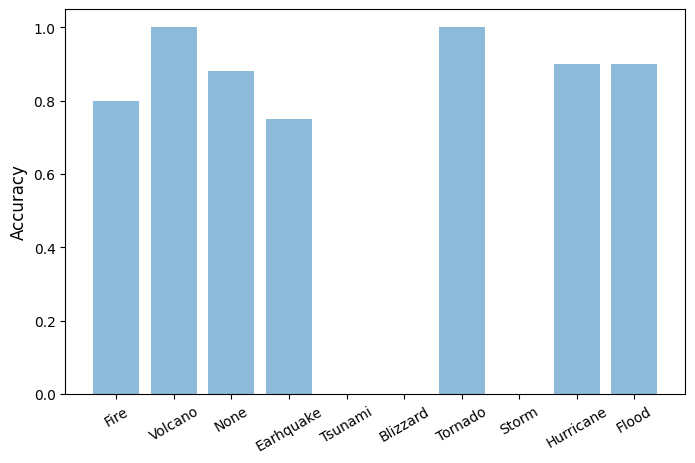

In [253]:

plt.rcParams['figure.figsize'] = (8.0, 5.0)
performance = []
objects = ( 'Fire','Volcano','None','Earhquake', 'Tsunami', 'Blizzard','Tornado','Storm','Hurricane','Flood')
y_pos = np.arange(len(objects))
for value in new_dic.values():
    performance.append(value[0])
# performance = [round(res[0],3),round(res_1[0],3),round(res_2[0],3),round(res_3[0],3),round(res_4[0],3),round(res_5[0],3),round(res_6[0],1,1,1]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(fontsize=10,rotation = 30)
# plt.xticks(fontsize=6,weight='bold')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy',fontsize=12)
# plt.title('Category Accuracy')
params = {
    'figure.figsize': '8, 8'
}
plt.rcParams.update(params)
# plt.show()

plt.savefig("Category_Accuracy_0.pdf")

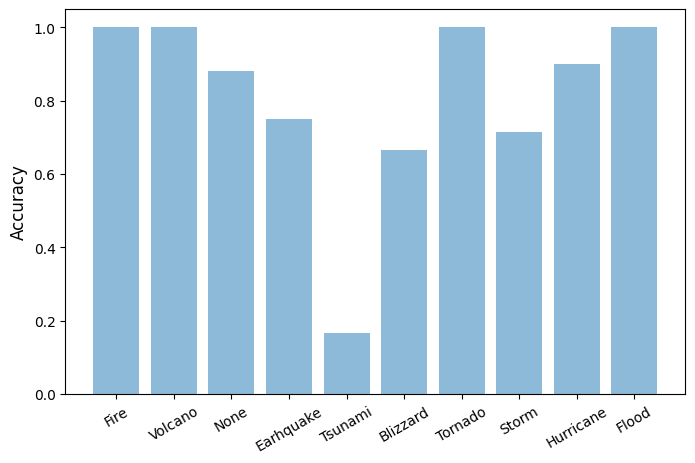

In [254]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
performance = []
objects = ( 'Fire','Volcano','None','Earhquake', 'Tsunami', 'Blizzard','Tornado','Storm','Hurricane','Flood')
y_pos = np.arange(len(objects))
for value in new_dic.values():
    performance.append(value[1])
# performance = [round(res[0],3),round(res_1[0],3),round(res_2[0],3),round(res_3[0],3),round(res_4[0],3),round(res_5[0],3),round(res_6[0],1,1,1]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(fontsize=10,rotation = 30)
# plt.xticks(fontsize=6,weight='bold')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy',fontsize=12)
# plt.title('Category Accuracy')
params = {
    'figure.figsize': '8, 8'
}
plt.rcParams.update(params)
# plt.show()

plt.savefig("Type_Accuracy_0.pdf")

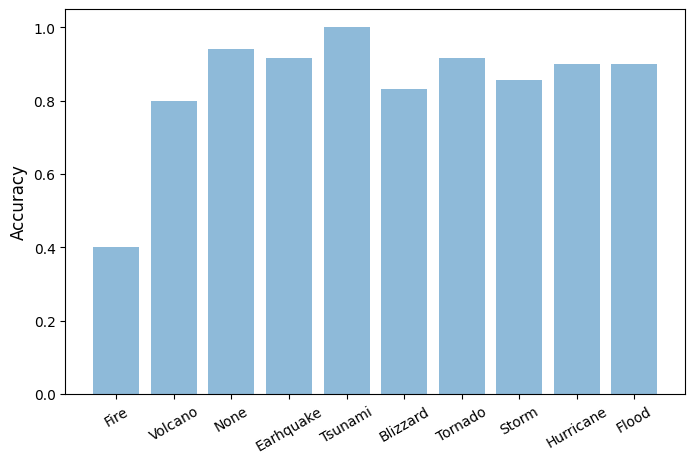

In [255]:
plt.rcParams['figure.figsize'] = (8.0, 5.0)
performance = []
objects = ( 'Fire','Volcano','None','Earhquake', 'Tsunami', 'Blizzard','Tornado','Storm','Hurricane','Flood')
y_pos = np.arange(len(objects))
for value in new_dic.values():
    performance.append(value[2])
# performance = [round(res[0],3),round(res_1[0],3),round(res_2[0],3),round(res_3[0],3),round(res_4[0],3),round(res_5[0],3),round(res_6[0],1,1,1]
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(fontsize=10,rotation = 30)
# plt.xticks(fontsize=6,weight='bold')
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy',fontsize=12)
# plt.title('Category Accuracy')
params = {
    'figure.figsize': '8, 8'
}
plt.rcParams.update(params)
# plt.show()

plt.savefig("Ner_Accuracy_0.pdf")

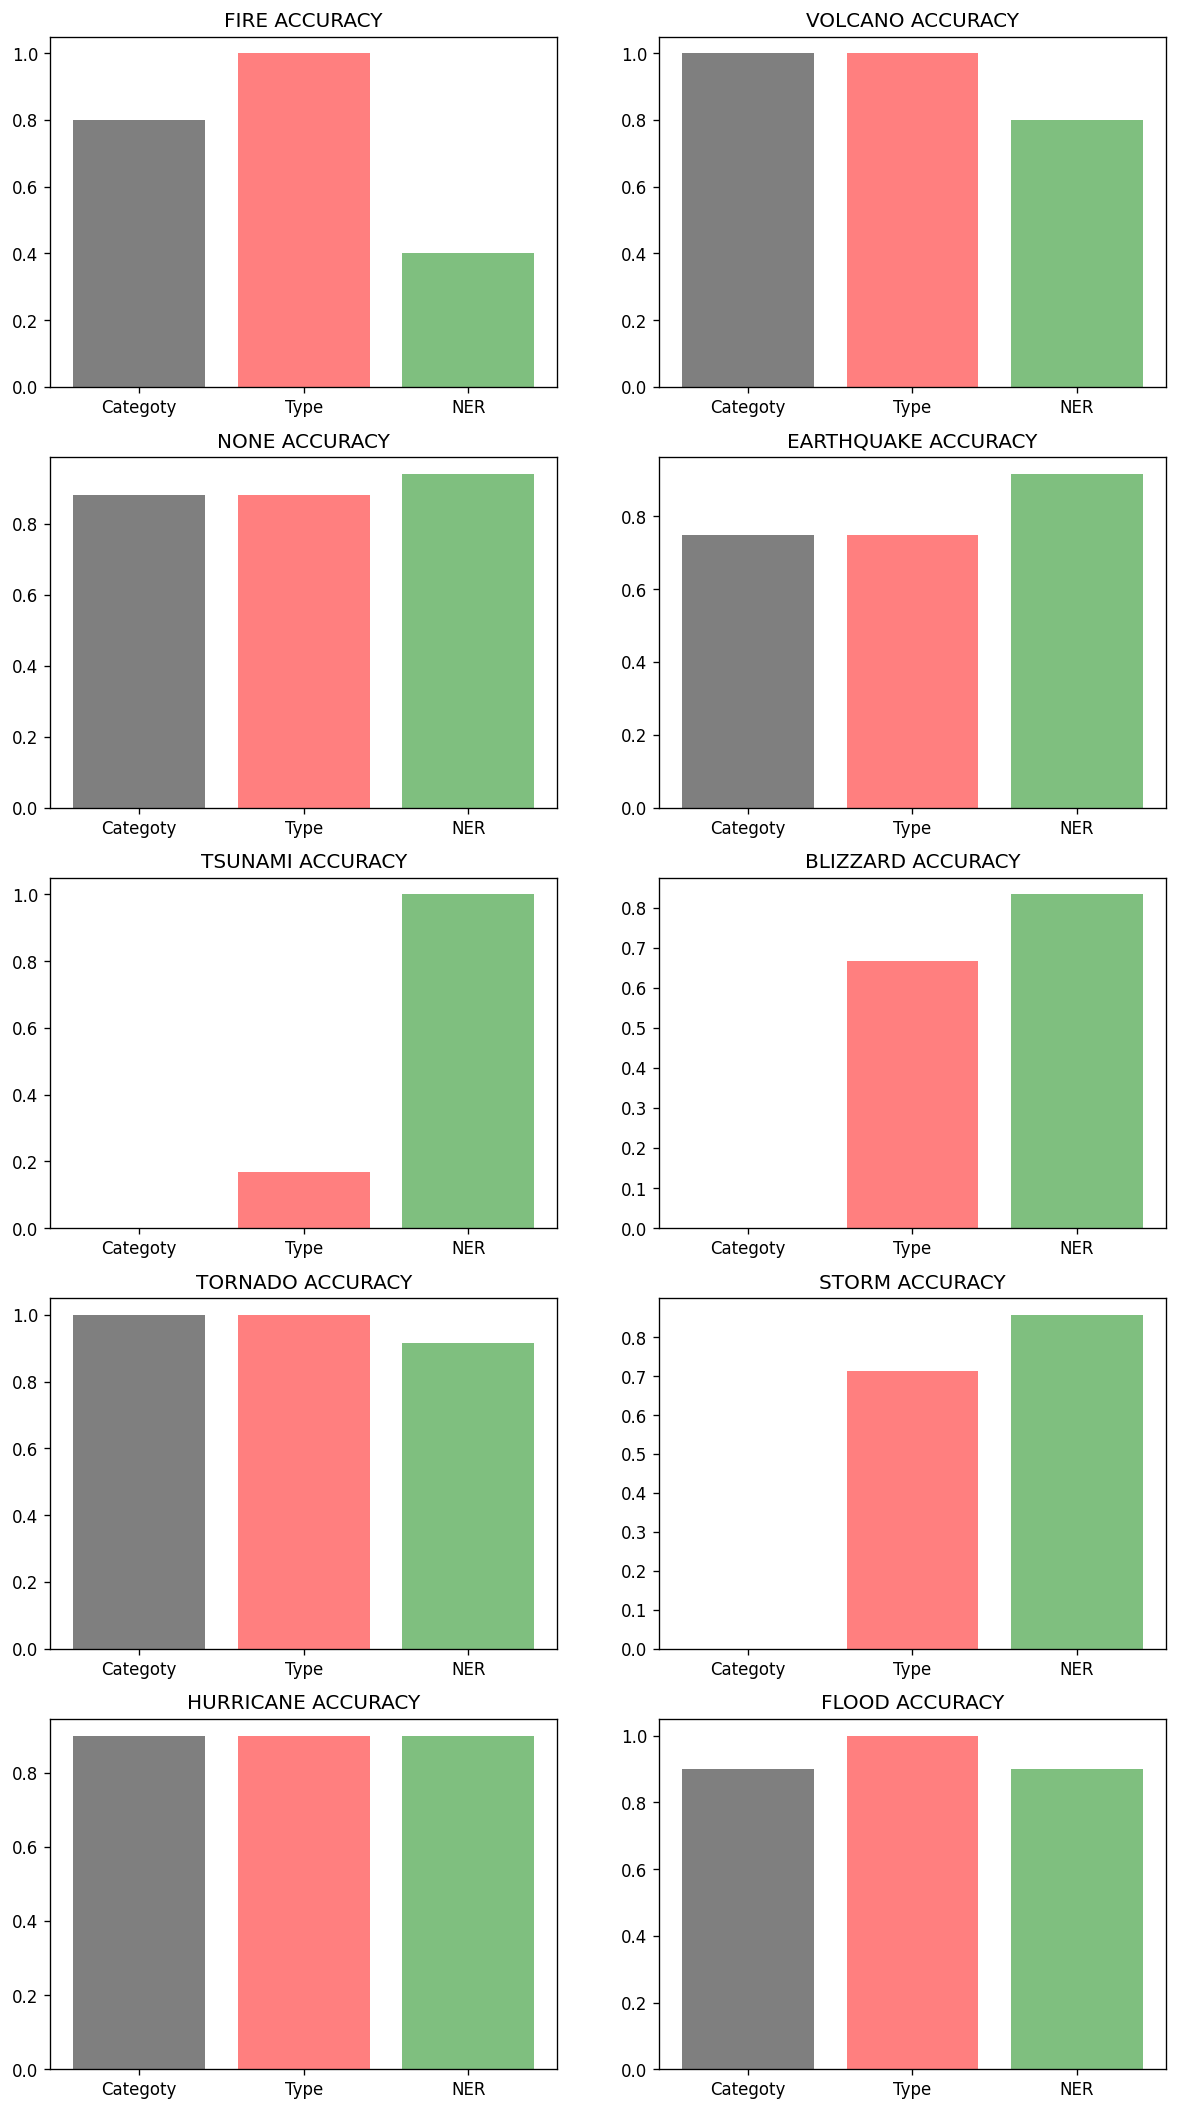

In [257]:
plt.figure(figsize=(12,22), dpi=120)
i=0
for (key,value) in new_dic.items():
    i+=1
#     print(type(key))
#     print(type(value))
    plt.subplot(5, 2, i)
    objects = ('Categoty', 'Type', 'NER')
    y_pos = np.arange(len(objects))
    performance = value
    plt.bar(y_pos, performance, align='center', alpha=0.5,color=['black', 'red', 'green'])
    plt.xticks(y_pos,objects,fontsize=10)
    plt.title(key.upper() +' ACCURACY')

# plt.savefig("Combo1.pdf")
plt.savefig("Combo1.pdf",bbox_inches='tight',pad_inches=0.0)
# print(type(round(res[0],3)))
    
    



In [230]:
df.fillna('', inplace=True)
type_num = 0
dis_num = 0
ner_num = 0 
multi_time = 0
ner_time = 0
total_time = 0
ner = 0
end_to_end = 0
chars = "\\`*_{}[]'(),>#+-.!$"
for i in range (num):
    
    if df['predict_type'][i] == df['real_type'][i]:
        type_num +=1
    if int(df['predict_if_disaster'][i]) == int(df['real_if_disaster'][i]):
        dis_num += 1
    for c in chars:
        if c in df['predict_location'][i]:
            df['predict_location'][i] = df['predict_location'][i].replace(c,' ')
    if list(set(df['predict_location'][i].lower().split())&set(str(df['real_location'][i]).lower().split())):
        ner_num +=1
        
    elif len(df['predict_location'][i]) ==0 and len(df['real_location'][i]) ==0:
#         print(i)

        ner_num += 1 
    
    if type(df['NER time'][i]) != str :
        ner += 1
        ner_time += df['NER time'][i]
        
    
    multi_time += df['MULTI time'][i]
#     ner_time += df['NER time'][i]
    total_time += df['total time'][i]
    end_to_end += df['end to end'][i]

    


print ("type acu",round(type_num/num,3))
print("disa acu", round(dis_num/num,3))
print("ner acu",round(ner_num/num,3))
print("multi ave",round(multi_time/num,3))
print("ner ave", round(ner_time/ner,3))
print("total ave", round(total_time/100,3))
print("end_to_end", round(end_to_end/100,3))

# print(type_num,dis_num,ner_num)


type acu 0.72
disa acu 0.85
ner acu 0.85
multi ave 0.527
ner ave 0.287
total ave 0.738
end_to_end 0.755


[0.527, 0.206, 0.738, 0.755]


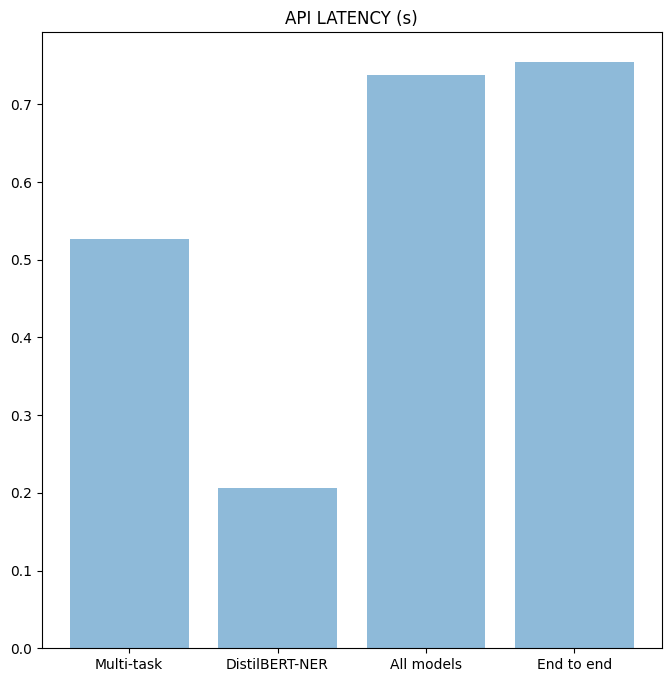

In [228]:
objects = ('Multi-task', 'DistilBERT-NER', 'All models','End to end')
y_pos = np.arange(len(objects))
performance = [round(multi_time/100,3),round(ner_time/100,3),round(total_time/100,3),round(end_to_end/100,3)]
print(performance)

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
# plt.xlabel('Time cost')
plt.title('API LATENCY (s)')


# plt.show()
plt.savefig("latency.pdf")

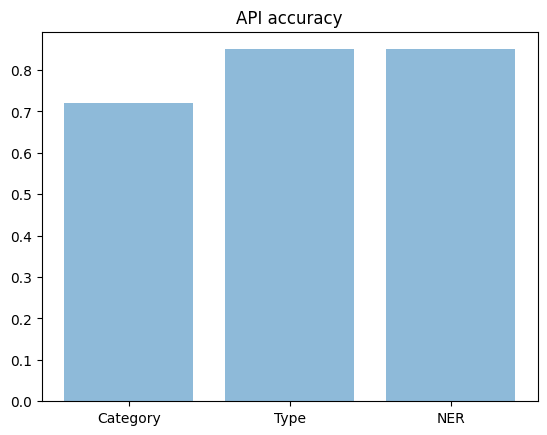

In [229]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Category', 'Type', 'NER')
y_pos = np.arange(len(objects))
performance = [type_num/100,dis_num/100,ner_num/100]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
# plt.xlabel('Model name')
plt.title('API accuracy')

plt.savefig("acc.pdf")
plt.show()